# Limit cycles

In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from phase_space_plotting import plot_traj, plot_field

## Examples

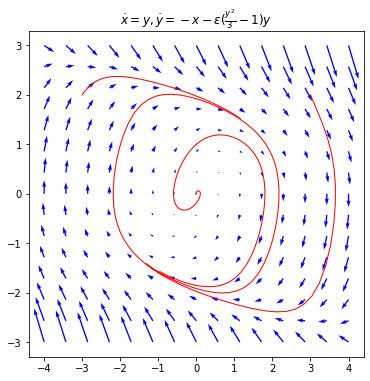

In [3]:
xlim = (-4, 4)
ylim = (-3, 3)

def dx_dt(x, t):
    epsilon = 1.0
    
    return [x[1], - x[0] - epsilon*(x[1]**2 / 3 - 1)*x[1]]

plt.figure(figsize=(6, 6))
plt.title('$\\dot{x} = y, \\dot{y} = -x -\\epsilon(\\frac{y^2}{3} - 1)y$')

plot_traj([3, 2], dx_dt, fw=10, bw=0, n_time_samples=100)
plot_traj([-3, 2], dx_dt, fw=2, bw=0, n_time_samples=100)
plot_traj([0, 1], dx_dt, fw=4, bw=-10, n_time_samples=100)

plot_field(dx_dt, xlim, ylim, scale=100)

plt.xlim(np.array(xlim) * 1.1)
plt.ylim(np.array(ylim) * 1.1)

plt.show()

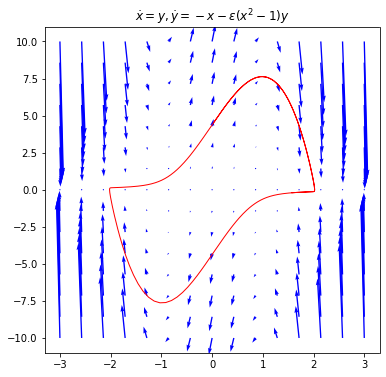

In [4]:
xlim = (-3, 3)
ylim = (-10, 10)

def dx_dt(x, t):
    epsilon = 5.0
    
    return [x[1], - x[0] - epsilon*(x[0]**2 - 1)*x[1]]

plt.figure(figsize=(6, 6))
plt.title('$\\dot{x} = y, \\dot{y} = -x -\\epsilon(x^2 - 1)y$')

plot_traj([0.03864691, 4.56820213], dx_dt, fw=15, bw=0, n_time_samples=1000)

plot_field(dx_dt, xlim, ylim, scale=1000)

plt.xlim(np.array(xlim) * 1.1)
plt.ylim(np.array(ylim) * 1.1)

plt.show()

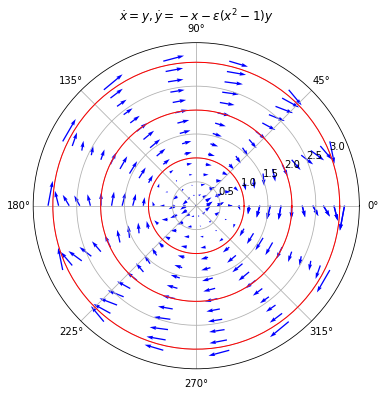

In [124]:
xlim = (0, 2*np.pi)
ylim = (0, 3.1)

def dx_dt(x, t):
    return [-1, x[1]*(1 - x[1])*(2 - x[1])*(3 - x[1])]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='polar')
ax.set_title('$\\dot{x} = y, \\dot{y} = -x -\\epsilon(x^2 - 1)y$')

plot_traj([0, 1], dx_dt, fw=6.3, bw=0, n_time_samples=100, ax=ax)
plot_traj([0, 2], dx_dt, fw=6.3, bw=0, n_time_samples=100, ax=ax)
plot_traj([0, 3], dx_dt, fw=6.3, bw=0, n_time_samples=100, ax=ax)

plot_field(dx_dt, xlim, ylim, scale=50, ax=ax, polar=True)

ax.set_xlim(xlim)
ax.set_ylim(np.array(ylim) * 1.1)

plt.show()